In [103]:
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
from datetime import date
from fbprophet import Prophet

In [104]:

zcash=pd.read_csv('zcash.csv')
zcash=zcash[::-1]
zcash.head()

,Date,Price,Open,High,Low,Vol.,Change %
466,29-Oct-16,"1,900.00","5,000.00","9,000.00","1,900.00",0.01K,-62.00
465,30-Oct-16,604.39001,"1,900.00","2,400.00",404.85001,0.02K,-68.19
464,31-Oct-16,"1,644.62",604.39001,"2,502.78",404.85001,0.05K,172.11
463,1-Nov-16,"1,373.00","1,644.62","2,080.88","1,047.45",0.06K,-16.52
462,2-Nov-16,975.52002,"1,373.00","1,500.00",851,0.08K,-28.95


In [105]:
zcash.tail(30)

,Date,Price,Open,High,Low,Vol.,Change %
29,9-Jan-18,664,686.66711,720.34412,630.09998,6.89K,-4.27
28,10-Jan-18,714,660.00146,720,613.33301,5.78K,7.53
27,11-Jan-18,642,711.00684,729,585,7.26K,-10.08
26,12-Jan-18,692.27698,643,711.98834,608,4.95K,7.83
25,13-Jan-18,693.92859,698.14001,720,682.37695,4.01K,0.24
24,14-Jan-18,662,693.92859,714.95001,631.23425,4.51K,-4.60
23,15-Jan-18,620,662,685,620,2.89K,-6.34
22,16-Jan-18,502,620,679.84998,445,15.35K,-19.03
21,17-Jan-18,493,502,529,395.85001,7.70K,-1.79
20,18-Jan-18,481.99969,493,534.99939,469.5,5.21K,-2.23


In [106]:
zcash['Price']=zcash['Price'].str.replace(',','')
zcash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 466 to 0
Data columns (total 7 columns):
Date        467 non-null object
Price       467 non-null object
Open        467 non-null object
High        467 non-null object
Low         467 non-null object
Vol.        467 non-null object
Change %    467 non-null float64
dtypes: float64(1), object(6)
memory usage: 25.6+ KB


In [107]:
zcash['Price']=zcash['Price'].astype(float)
zcash['Date']=pd.to_datetime(zcash['Date'])
zcash.set_index('Date',inplace=True)
zcash.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 467 entries, 2016-10-29 to 2018-02-07
Data columns (total 6 columns):
Price       467 non-null float64
Open        467 non-null object
High        467 non-null object
Low         467 non-null object
Vol.        467 non-null object
Change %    467 non-null float64
dtypes: float64(2), object(4)
memory usage: 25.5+ KB


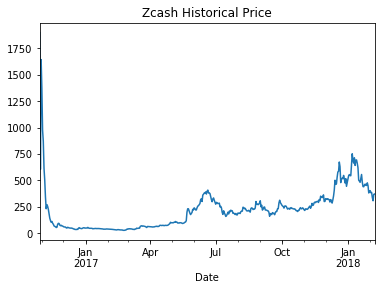

In [108]:
zcash['Price'].plot(title='Zcash Historical Price')
plt.figure(figsize=(50,20))
plt.show()

In [109]:
zcash.reset_index(inplace=True)
zcash.rename(columns={'Date':'ds','Price':'y'},inplace=True)
zcash=zcash[['ds','y']]


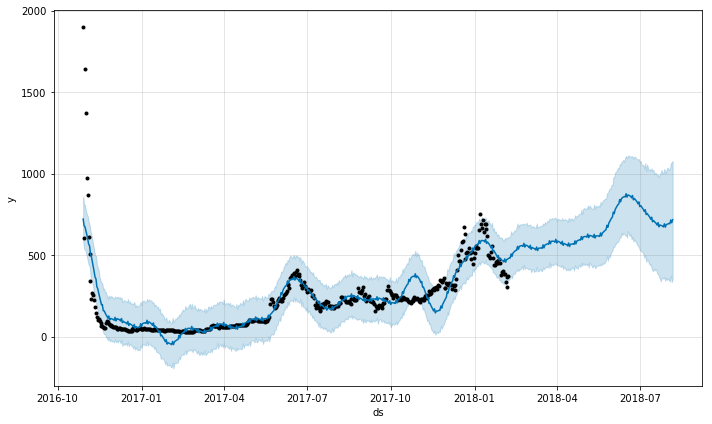

In [110]:
m=Prophet(yearly_seasonality=True)
m.fit(zcash)
future=m.make_future_dataframe(periods=180,freq='D')
forecast=m.predict(future)
plt.figure(figsize=(30,10))
fig=m.plot(forecast)
plt.show()

In [111]:
next_180=forecast.iloc[-180:,:][['ds','yhat','yhat_lower','yhat_upper']]
next_180.rename(columns={'ds':'Date','yhat':'zcash price','yhat_lower':'Lower','yhat_upper':'Upper'},inplace=True)
next_180


,Date,zcash price,Lower,Upper
467,2018-02-08,482.838663,350.932101,612.118295
468,2018-02-09,483.262424,358.822748,615.446582
469,2018-02-10,507.802673,373.250197,647.138122
470,2018-02-11,492.589531,358.315629,629.275929
471,2018-02-12,512.735798,384.940479,636.882208
472,2018-02-13,518.934664,387.001398,647.353109
473,2018-02-14,524.134481,384.631632,651.104549
474,2018-02-15,529.433169,399.096383,653.270899
475,2018-02-16,530.013191,404.108582,670.973675
476,2018-02-17,553.692571,416.841695,694.716945
